In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
classifier.add(Flatten())

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [8]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
classifier.fit(training_set,
steps_per_epoch = 8000//32,
epochs = 25,
validation_data = test_set,
validation_steps = 2000//32)

Epoch 1/25
104/250 [===========>..................] - ETA: 3:44 - loss: 0.7869 - accuracy: 0.5391

KeyboardInterrupt: 

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(64,64))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = classifier.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

[[1.]]


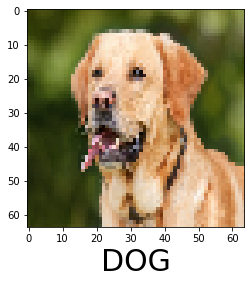

In [82]:
predictImage('dataset/single_prediction/cat_or_dog_1.jpg')